In [252]:
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd

from keras.models import Model
from keras.layers import Dense, Input

import matplotlib.pyplot as plt

### Load Data

In [253]:
data = datasets.load_digits(return_X_y=True)
X = data[0]
Y = data[1]

In [254]:
# Scaling:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [255]:
data = np.hstack([X,Y.reshape(-1,1)])
print(data.shape)

(1797, 65)


In [256]:
# Unique labels:
pd.unique(data[:,-1])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

### Train-Valid Split

In [257]:
dtrain, dvalid = train_test_split(data, random_state=1028, train_size=0.85)
print(dtrain.shape)
print(dvalid.shape)

(1527, 65)
(270, 65)


In [258]:
X_train = dtrain[:,:-1]
Y_train = dtrain[:,-1]

X_valid = dvalid[:,:-1]
Y_valid = dvalid[:,-1]

### Baseline Model with default hyper-parameters

In [259]:
model = GradientBoostingClassifier()

In [260]:
model.fit(X=X_train,y=Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [261]:
pred = model.predict(X=X_valid)

In [262]:
print("Valid Accuracy:{}".format(round(np.sum(pred == Y_valid)/float(len(pred)),4)))

Valid Accuracy:0.9778


### Auto-Encoder:

In [306]:
NCOLS = 64
input_layer = Input(shape=(NCOL,))

encoder = Dense(int(NCOLS*2), activation="relu")(input_layer)
encoder = Dense(int(NCOLS*3), activation="relu")(encoder)
encoder = Dense(int(NCOLS*1), activation="relu")(encoder)
encoder = Dense(int(NCOLS/2), activation="relu")(encoder)
encoder = Dense(int(NCOLS/4), activation="relu")(encoder)
visual_encoder = Dense(2, activation="tanh")(encoder)


decoder = Dense(int(NCOLS/8), activation='relu')(visual_encoder)
decoder = Dense(int(NCOLS/4), activation='relu')(decoder)
decoder_op = Dense(int(NCOLS/2), activation='relu')(decoder)
decoder = Dense(int(NCOLS), activation='relu')(decoder_op)


In [307]:

# reconstructer = Model(input=input_layer, output=encoder)
#Autoencoder Model:
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train,validation_data=(X_valid, X_valid), epochs=290, batch_size=128)

Train on 1527 samples, validate on 270 samples
Epoch 1/290

1527/1527 [==============================] - ETA: 0s - loss: 0.2128 - val_loss: 0.1910
Epoch 2/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1798 - val_loss: 0.1667
Epoch 3/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1597 - val_loss: 0.1527
Epoch 4/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1507 - val_loss: 0.1474
Epoch 5/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1474 - val_loss: 0.1455
Epoch 6/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1449 - val_loss: 0.1415
Epoch 7/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1392 - val_loss: 0.1351
Epoch 8/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1343 - val_loss: 0.1321
Epoch 9/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1322 - val_loss: 0.1307
Epoch 10/290

1527/1527 [============================

1527/1527 [==============================] - ETA: 0s - loss: 0.1106 - val_loss: 0.1102
Epoch 36/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1105 - val_loss: 0.1102
Epoch 37/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1104 - val_loss: 0.1100
Epoch 38/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1102 - val_loss: 0.1099
Epoch 39/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1098 - val_loss: 0.1099
Epoch 40/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1098 - val_loss: 0.1101
Epoch 41/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1095 - val_loss: 0.1097
Epoch 42/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1094 - val_loss: 0.1093
Epoch 43/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1091 - val_loss: 0.1087
Epoch 44/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1091 - val_loss: 0.1085
Epoc

Epoch 70/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1025 - val_loss: 0.1017
Epoch 71/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1022 - val_loss: 0.1010
Epoch 72/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1025 - val_loss: 0.1018
Epoch 73/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1025 - val_loss: 0.1010
Epoch 74/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1019 - val_loss: 0.1010
Epoch 75/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1014 - val_loss: 0.1003
Epoch 76/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1008 - val_loss: 0.1002
Epoch 77/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1005 - val_loss: 0.0999
Epoch 78/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1002 - val_loss: 0.0996
Epoch 79/290

1527/1527 [==============================] - ETA: 0s - loss: 0.1000 - val_los

1527/1527 [==============================] - ETA: 0s - loss: 0.0744 - val_loss: 0.0739
Epoch 105/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0743 - val_loss: 0.0739
Epoch 106/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0742 - val_loss: 0.0739
Epoch 107/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0741 - val_loss: 0.0737
Epoch 108/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0741 - val_loss: 0.0736
Epoch 109/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0740 - val_loss: 0.0737
Epoch 110/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0740 - val_loss: 0.0735
Epoch 111/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0739 - val_loss: 0.0734
Epoch 112/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0737 - val_loss: 0.0732
Epoch 113/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0736 - val_loss: 0.

Epoch 139/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0721 - val_loss: 0.0719
Epoch 140/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0720 - val_loss: 0.0720
Epoch 141/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0719 - val_loss: 0.0718
Epoch 142/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0718 - val_loss: 0.0719
Epoch 143/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0718 - val_loss: 0.0718
Epoch 144/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0718 - val_loss: 0.0718
Epoch 145/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0717 - val_loss: 0.0718
Epoch 146/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0716 - val_loss: 0.0717
Epoch 147/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0716 - val_loss: 0.0718
Epoch 148/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0715

1527/1527 [==============================] - ETA: 0s - loss: 0.0536 - val_loss: 0.0526
Epoch 174/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0520 - val_loss: 0.0509
Epoch 175/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0502 - val_loss: 0.0490
Epoch 176/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0490 - val_loss: 0.0485
Epoch 177/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0485 - val_loss: 0.0481
Epoch 178/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0482 - val_loss: 0.0478
Epoch 179/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0481 - val_loss: 0.0478
Epoch 180/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0479 - val_loss: 0.0476
Epoch 181/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0478 - val_loss: 0.0477
Epoch 182/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0477 - val_loss: 0.

Epoch 208/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0461 - val_loss: 0.0463
Epoch 209/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0461 - val_loss: 0.0463
Epoch 210/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0461 - val_loss: 0.0462
Epoch 211/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0461 - val_loss: 0.0463
Epoch 212/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0460 - val_loss: 0.0462
Epoch 213/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0460 - val_loss: 0.0462
Epoch 214/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0459 - val_loss: 0.0462
Epoch 215/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0459 - val_loss: 0.0462
Epoch 216/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0458 - val_loss: 0.0460
Epoch 217/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0457

1527/1527 [==============================] - ETA: 0s - loss: 0.0440 - val_loss: 0.0446
Epoch 243/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0438 - val_loss: 0.0446
Epoch 244/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0437 - val_loss: 0.0446
Epoch 245/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0436 - val_loss: 0.0445
Epoch 246/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0435 - val_loss: 0.0445
Epoch 247/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0434 - val_loss: 0.0443
Epoch 248/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0434 - val_loss: 0.0445
Epoch 249/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0433 - val_loss: 0.0443
Epoch 250/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0433 - val_loss: 0.0444
Epoch 251/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0433 - val_loss: 0.

Epoch 277/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0419 - val_loss: 0.0434
Epoch 278/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0418 - val_loss: 0.0434
Epoch 279/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0419 - val_loss: 0.0435
Epoch 280/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0418 - val_loss: 0.0433
Epoch 281/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0418 - val_loss: 0.0433
Epoch 282/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0418 - val_loss: 0.0437
Epoch 283/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0419 - val_loss: 0.0432
Epoch 284/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0418 - val_loss: 0.0433
Epoch 285/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0417 - val_loss: 0.0430
Epoch 286/290

1527/1527 [==============================] - ETA: 0s - loss: 0.0416

#### To Visualize in 2 Dimensions: 
Looks at the clear separation in 2 dimensions

In [308]:
visualizer = Model(input=input_layer, output=visual_encoder)
encoded_imgs = visualizer.predict(X_valid)

encoded_imgs

/Users/y0w0252/my-python/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


array([[  7.26237893e-01,  -2.37095371e-01],
       [  2.25528255e-01,  -7.93147206e-01],
       [ -3.43072027e-01,   3.30619290e-02],
       [  2.23654546e-02,  -1.38264820e-01],
       [ -7.99197793e-01,  -3.91440898e-01],
       [  1.25219785e-02,  -5.96128166e-01],
       [  2.19873428e-01,  -6.95221424e-01],
       [  1.55159071e-01,  -5.55587649e-01],
       [ -3.20985049e-01,  -8.15697789e-01],
       [  6.06013358e-01,  -6.56807005e-01],
       [  2.22036690e-01,  -6.90973759e-01],
       [ -8.60885307e-02,  -8.87162566e-01],
       [ -5.96452534e-01,  -3.93158168e-01],
       [ -2.89845854e-01,  -3.92339647e-01],
       [ -1.40666530e-01,  -5.87888598e-01],
       [ -9.30318415e-01,  -4.98751402e-01],
       [ -7.61741579e-01,  -4.35739428e-01],
       [ -4.11706626e-01,   2.46045083e-01],
       [ -4.02164251e-01,  -6.15381837e-01],
       [  5.97245753e-01,  -2.02901497e-01],
       [ -2.67520756e-01,  -7.48910904e-01],
       [  1.00143693e-01,  -4.31157023e-01],
       [ -

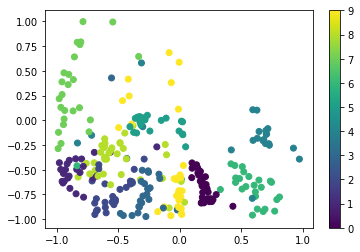

In [309]:
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=Y_valid)
plt.colorbar()
plt.show()

### Rebuild-Model with Less Dimension

In [310]:
reconstructer = Model(input=input_layer, output=decoder_op)

/Users/y0w0252/my-python/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [311]:
new_X_train = reconstructer.predict(X_train)
new_X_valid = reconstructer.predict(X_valid)

In [312]:
new_X_train.shape

(1527, 32)

In [313]:
model2 = GradientBoostingClassifier()

In [314]:
model2.fit(X=new_X_train,y=Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [304]:
pred2 = model2.predict(X=new_X_valid)

In [305]:
print("Valid Accuracy:{}".format(round(np.sum(pred2 == Y_valid)/float(len(pred2)),4)))

Valid Accuracy:0.7889
